# chord_length_distribution

## Import packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

## Create image and variables

Variables created are bins, log, voxel_size, and normalization.
The image is created using the blobs generator function, then the prune_branches filter is applied. The image plotted is below:

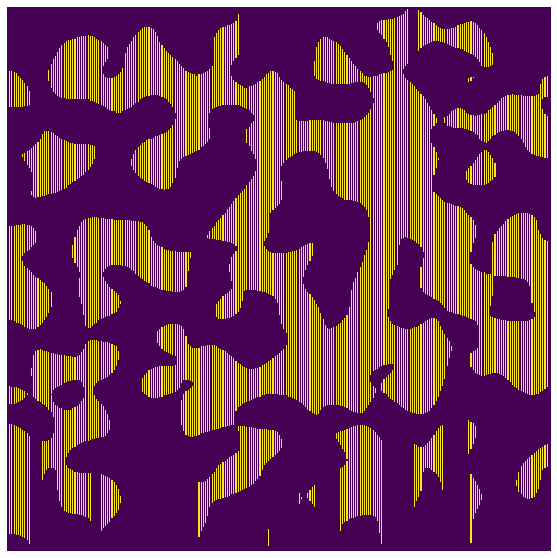

In [2]:
im = ps.generators.blobs(shape=[500, 500])
im = ps.filters.apply_chords(im, spacing=1, axis=0, trim_edges=True, label=False)

plt.figure(figsize=[7,7])
plt.axis(False)
plt.imshow(im)

#default values:
bins = None
log = False
voxel_size = 1
normalization = "count"

## Apply metric function

Output is a tuple with elements L, pdf, cdf, relfreq, bin_centers, bin_edges, and bin_widths.

### default

In [3]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

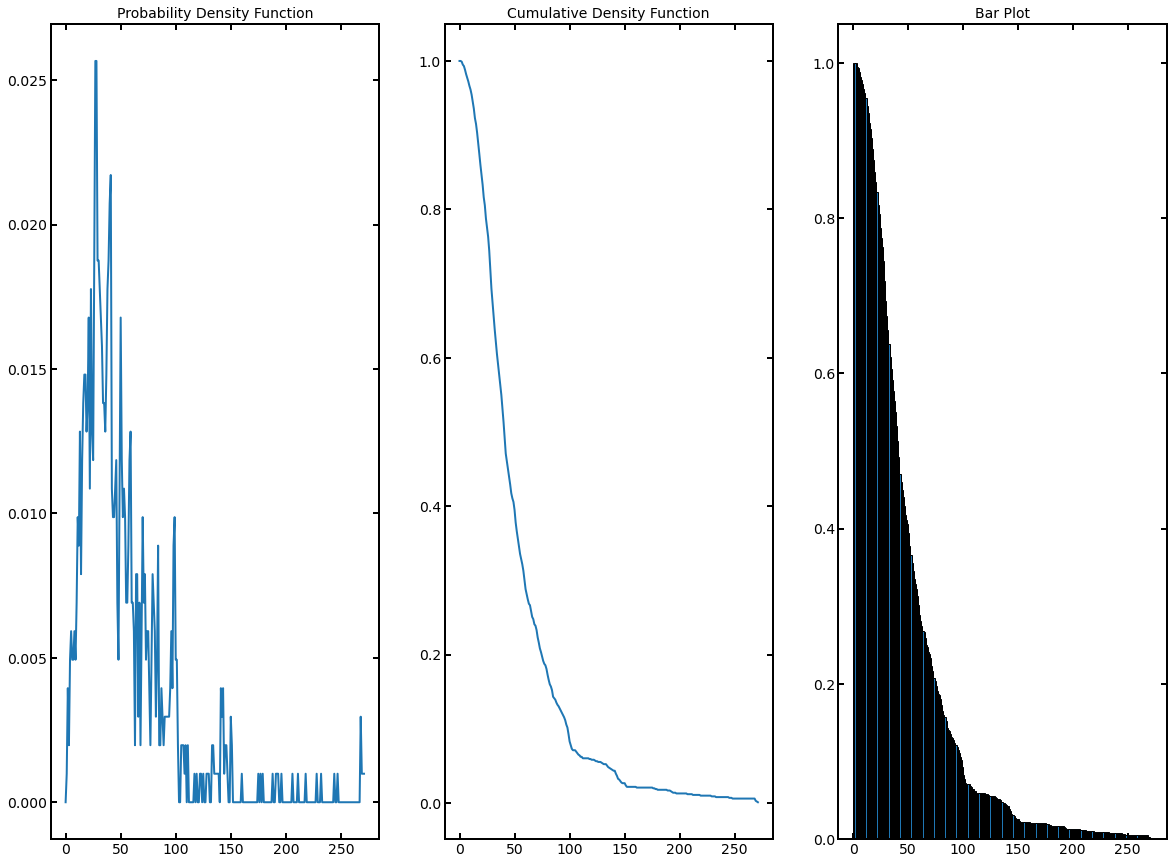

In [4]:
fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.L, x.cdf, x.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

### bins

In [5]:
x = ps.metrics.chord_length_distribution(im=im, bins= 5, log=log, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

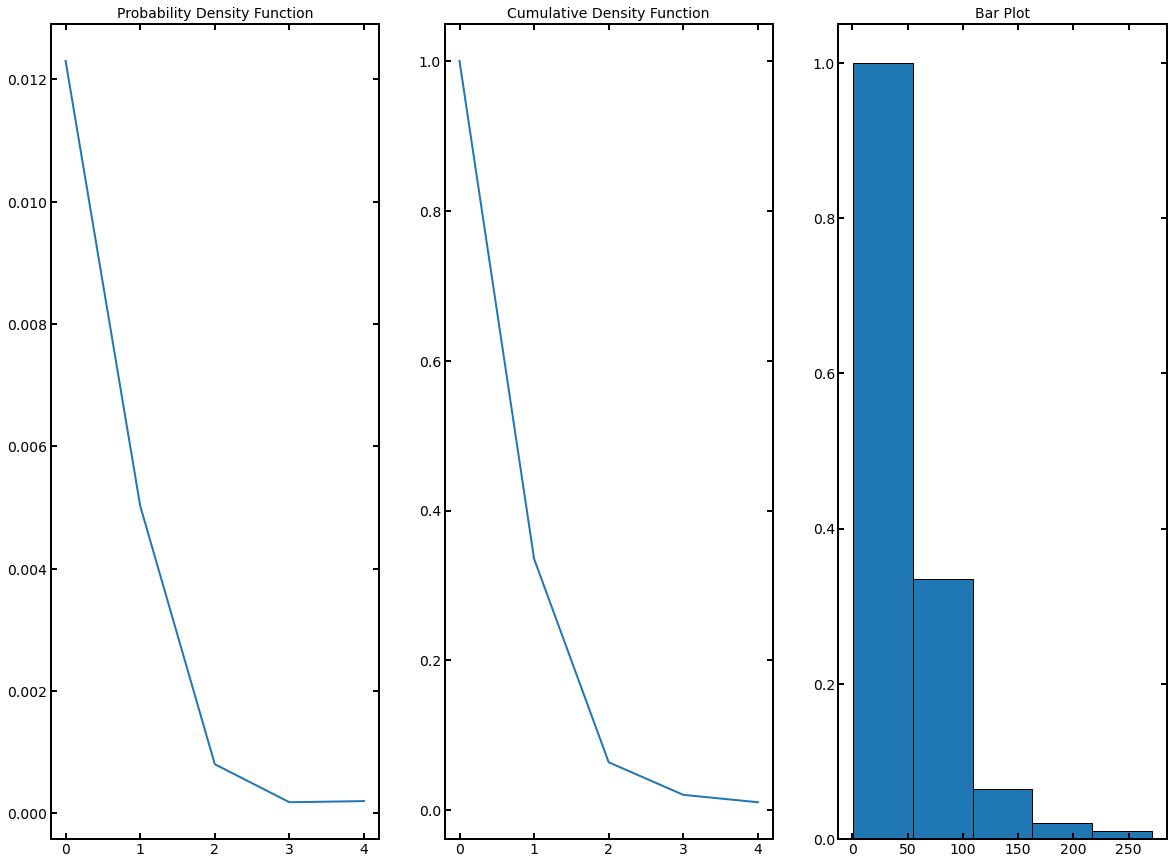

In [6]:
fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.L,x.cdf,  x.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

### log

In [7]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=True, voxel_size=voxel_size, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

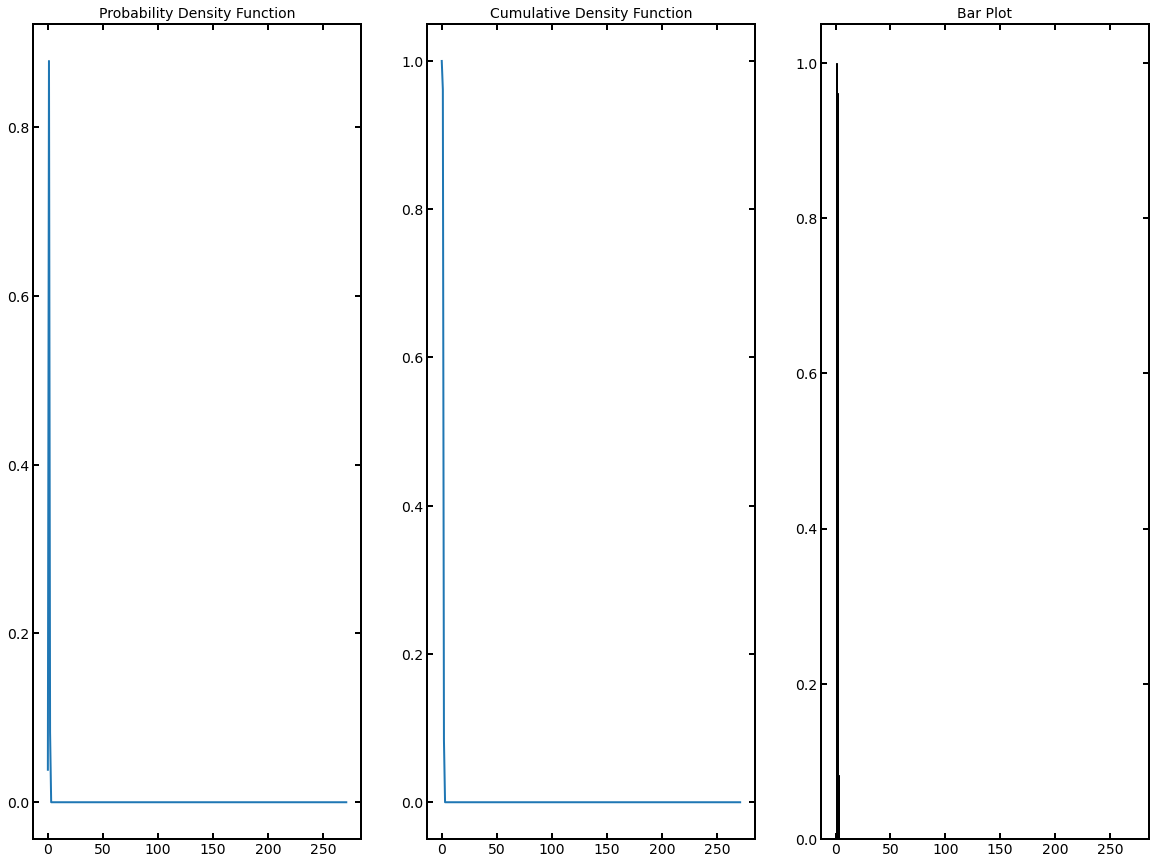

In [8]:
fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.LogL, x.cdf, x.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

### voxel_size

In [9]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=5, normalization=normalization)

Plot results:

Text(0.5, 1.0, 'Bar Plot')

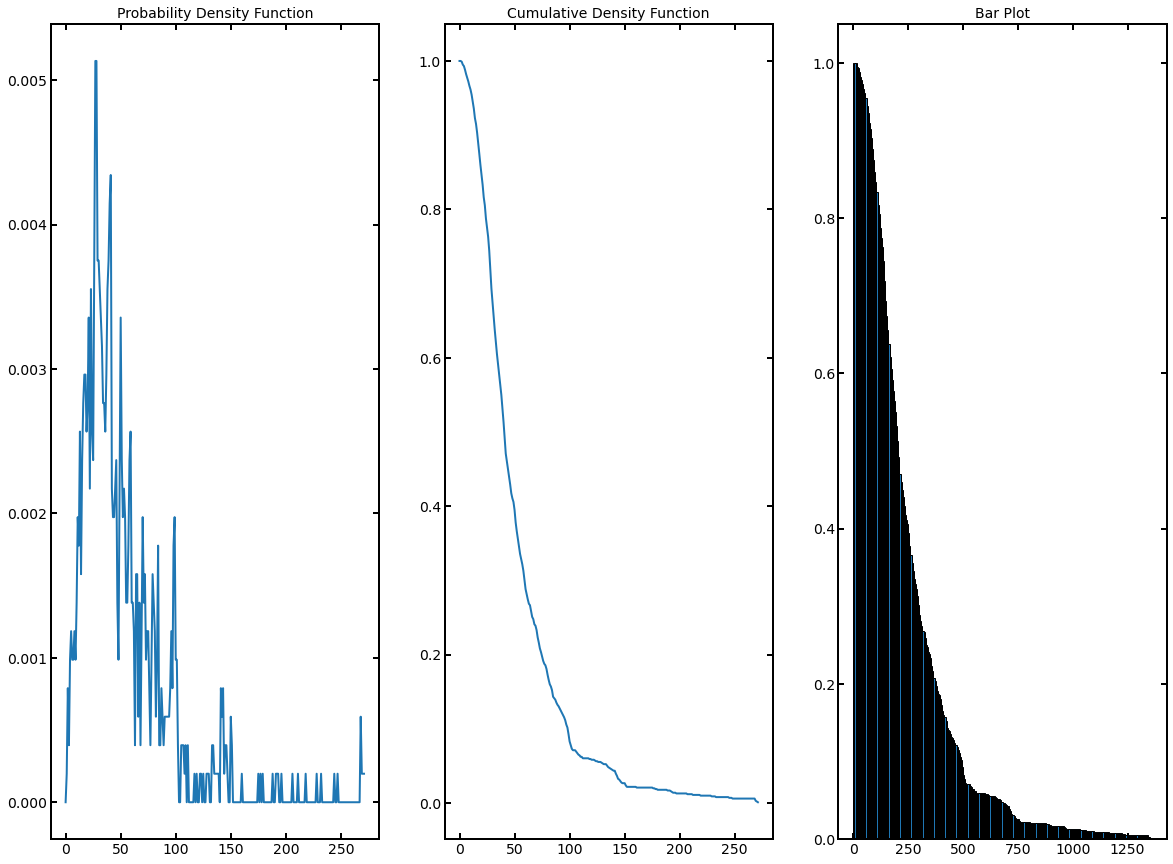

In [10]:
fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.L, x.cdf, x.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

### normalization
options are count or length

In [11]:
x = ps.metrics.chord_length_distribution(im=im, bins= bins, log=log, voxel_size=voxel_size, normalization='length')

Plot results:

Text(0.5, 1.0, 'Bar Plot')

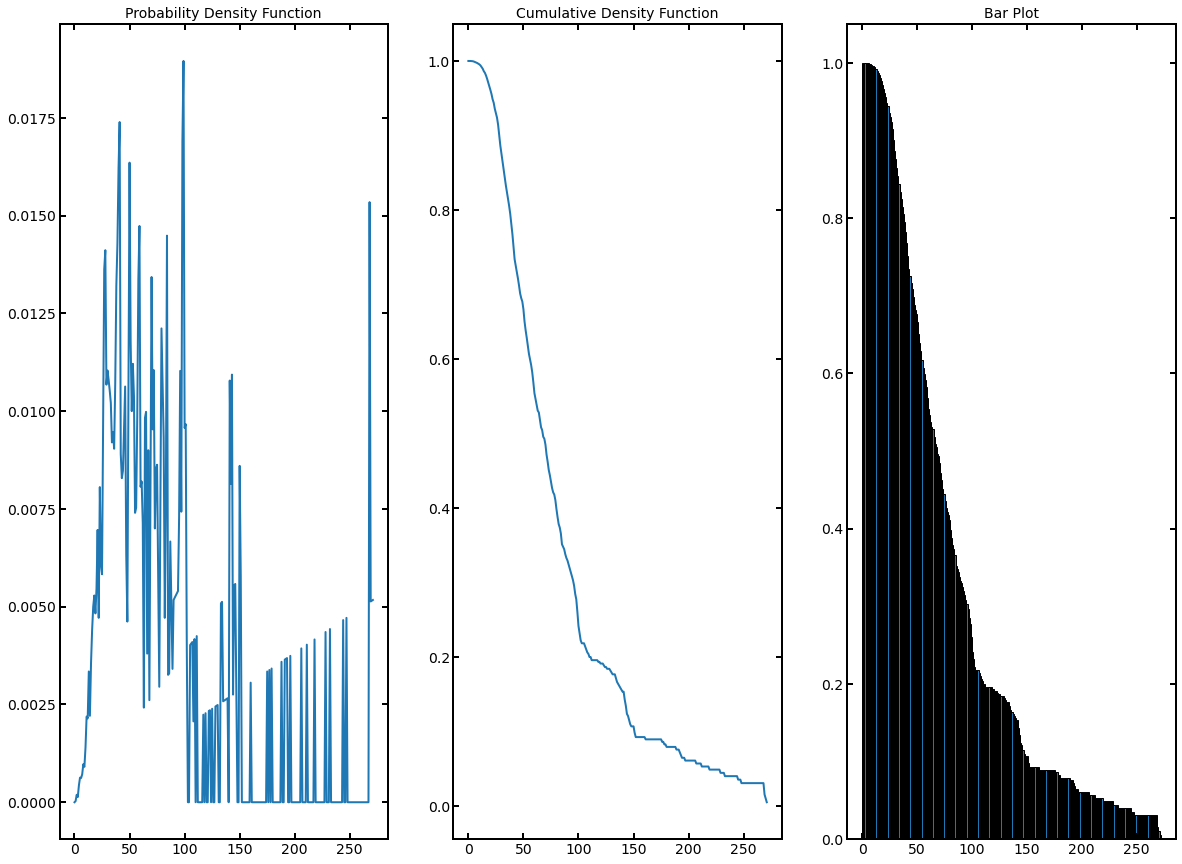

In [12]:
fig, ax = plt.subplots(1, 3, figsize=[20, 15]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[2].bar(x.L, x.cdf, x.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');